데이터 불러오기

In [1]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [4]:
df= pd.read_csv('/Users/dohee/Documents/ds_study/ML_project1/datas/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


데이터 나누기

random_state = 2023, test_size = 0.3

In [6]:
X = df.drop(labels=['filename', 'length','tempo','label'],axis=1)
Y = df['label']

In [8]:
scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2023)

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6993, 56) (6993,)
(2997, 56) (2997,)


KNN model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k=1
clf=KNeighborsClassifier().fit(X_train, y_train)
print(clf)

yhat=clf.predict(X_test)
print('Train set Accuracy : ', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test set Accuracy : ', metrics.accuracy_score(y_test, yhat))

KNeighborsClassifier()
Train set Accuracy :  0.9445159445159446
Test set Accuracy :  0.9019019019019019


In [12]:
Ks=10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print(mean_acc)

[0.93760427 0.90824157 0.91491491 0.90323657 0.9019019  0.88755422
 0.88755422 0.87687688 0.87287287]


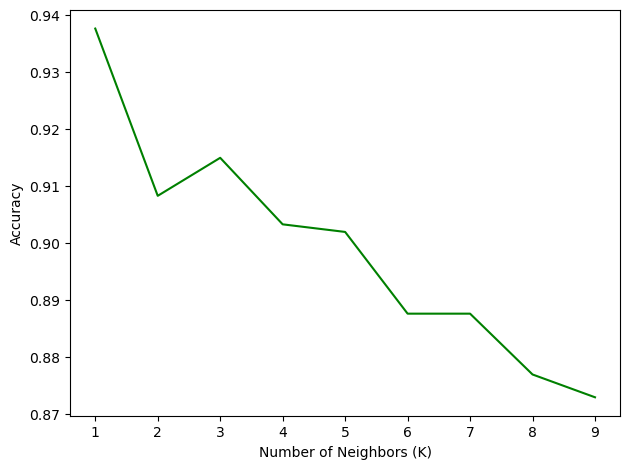

In [13]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, yhat)

array([[269,   2,  10,   1,   1,   4,   0,   0,   4,   3],
       [  0, 279,   2,   1,   0,   7,   0,   0,   0,   1],
       [  5,   5, 264,  13,   0,   4,   0,   3,  16,   9],
       [  1,   2,   4, 273,   3,   1,   0,   1,   0,  12],
       [  1,   0,  10,  15, 233,   0,   4,   5,   9,   5],
       [  5,  23,  14,   3,   0, 262,   0,   0,   2,   3],
       [  4,   1,   1,   8,   1,   0, 271,   0,   2,   6],
       [  0,   0,   6,   9,   7,   3,   0, 264,  12,   4],
       [  4,   2,   8,   7,   9,   0,   0,   3, 266,   6],
       [  7,   3,   9,  18,   3,   5,  13,   2,   4, 235]])

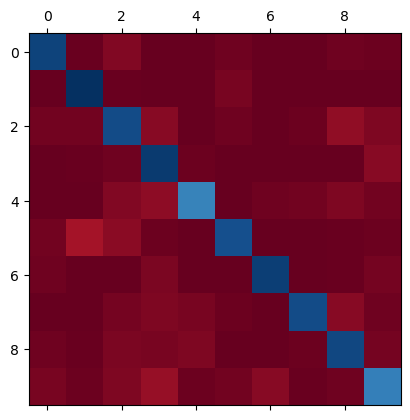

In [15]:
cmf = confusion_matrix(y_test, yhat)
plt.matshow(cmf, cmap=plt.cm.RdBu)
plt.show()

---

## 클래식

In [16]:
from collections import Counter

In [21]:
cols = X_test.columns.tolist()
cols

['chroma_stft_mean',
 'chroma_stft_var',
 'rms_mean',
 'rms_var',
 'spectral_centroid_mean',
 'spectral_centroid_var',
 'spectral_bandwidth_mean',
 'spectral_bandwidth_var',
 'rolloff_mean',
 'rolloff_var',
 'zero_crossing_rate_mean',
 'zero_crossing_rate_var',
 'harmony_mean',
 'harmony_var',
 'perceptr_mean',
 'perceptr_var',
 'mfcc1_mean',
 'mfcc1_var',
 'mfcc2_mean',
 'mfcc2_var',
 'mfcc3_mean',
 'mfcc3_var',
 'mfcc4_mean',
 'mfcc4_var',
 'mfcc5_mean',
 'mfcc5_var',
 'mfcc6_mean',
 'mfcc6_var',
 'mfcc7_mean',
 'mfcc7_var',
 'mfcc8_mean',
 'mfcc8_var',
 'mfcc9_mean',
 'mfcc9_var',
 'mfcc10_mean',
 'mfcc10_var',
 'mfcc11_mean',
 'mfcc11_var',
 'mfcc12_mean',
 'mfcc12_var',
 'mfcc13_mean',
 'mfcc13_var',
 'mfcc14_mean',
 'mfcc14_var',
 'mfcc15_mean',
 'mfcc15_var',
 'mfcc16_mean',
 'mfcc16_var',
 'mfcc17_mean',
 'mfcc17_var',
 'mfcc18_mean',
 'mfcc18_var',
 'mfcc19_mean',
 'mfcc19_var',
 'mfcc20_mean',
 'mfcc20_var']

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_classical1 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/classical/Antonio Vivaldi_3s.csv")
new_x = df_classical1.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'rock': 2, 'classical': 174, 'jazz': 31, 'reggae': 7, 'country': 9})

In [24]:
df_classical2 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/classical/Georges Bizet_3s.csv")
new_x = df_classical2.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'classical': 39, 'rock': 7, 'disco': 1})

In [25]:
df_classical3 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/classical/Johann Strauss II_3s.csv")
new_x = df_classical2.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'classical': 39, 'rock': 7, 'disco': 1})

In [26]:
df_classical4 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/classical/Mozart_3s.csv")
new_x = df_classical2.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'classical': 39, 'rock': 7, 'disco': 1})

In [27]:
df_classical5 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/classical/Vienna Philharmonic_3s.csv")
new_x = df_classical5.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'classical': 94})

## 블루스

In [28]:
df_blues1 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/blues/Blues Delight2_3s.csv")
new_x = df_blues1.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'jazz': 52,
         'classical': 9,
         'blues': 13,
         'reggae': 14,
         'hiphop': 16,
         'disco': 14,
         'country': 12,
         'rock': 4,
         'pop': 3})

In [29]:
df_blues2 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/blues/Blues_Delight_3s.csv")
new_x = df_blues2.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'pop': 1,
         'blues': 44,
         'reggae': 8,
         'country': 18,
         'jazz': 18,
         'hiphop': 3,
         'rock': 1,
         'classical': 1})

In [30]:
df_blues3 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/blues/Jessy Martens_3s.csv")
new_x = df_blues3.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'blues': 79,
         'reggae': 34,
         'jazz': 19,
         'rock': 2,
         'country': 11,
         'hiphop': 5,
         'pop': 1,
         'classical': 4})

In [31]:
df_blues4 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/blues/The Buddaheads_3s.csv")
new_x = df_blues4.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'blues': 32,
         'reggae': 16,
         'disco': 17,
         'hiphop': 49,
         'jazz': 22,
         'country': 3,
         'rock': 2,
         'pop': 2,
         'metal': 1})

In [32]:
df_blues5 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/blues/Twelve Bar Blues Band_3s.csv")
new_x = df_blues5.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'jazz': 40,
         'reggae': 14,
         'disco': 10,
         'rock': 9,
         'blues': 49,
         'country': 30,
         'hiphop': 38,
         'classical': 1,
         'pop': 3})

## 메탈

In [33]:
df_metal1 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/metal/Enter Sandman_3s.csv")
new_x = df_metal1.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'reggae': 6,
         'country': 48,
         'classical': 1,
         'hiphop': 16,
         'disco': 16,
         'pop': 17,
         'metal': 1,
         'rock': 2,
         'jazz': 3})

In [34]:
df_metal2 = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/metal/Judas Priest_3s.csv")
new_x = df_metal2.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'classical': 1,
         'rock': 9,
         'disco': 26,
         'pop': 20,
         'jazz': 1,
         'country': 12})

## 재즈

In [35]:
df_jazz = pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/jazz/Norah Jones_3s.csv")
new_x = df_jazz.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'jazz': 9, 'pop': 4, 'country': 33, 'blues': 7, 'reggae': 7})

## 레게

In [36]:
df_reggae1= pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/reggae/Rockinit_3s.csv")
new_x = df_reggae1.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'hiphop': 35,
         'classical': 3,
         'reggae': 46,
         'pop': 7,
         'blues': 4,
         'jazz': 5,
         'country': 3,
         'disco': 7})

In [38]:
df_reggae2= pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/reggae/Under the sun_3s.csv")
new_x = df_reggae2.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'reggae': 48, 'hiphop': 21, 'disco': 5})

## 락

In [39]:
df_rock= pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/rock/5 Seconds of Summer_3s.csv")
new_x = df_rock.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'classical': 5,
         'country': 19,
         'disco': 17,
         'rock': 8,
         'hiphop': 21,
         'pop': 2})

## 팝

In [40]:
df_pop1= pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/pop/Charlie Puth.csv")
new_x = df_pop1.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'reggae': 16, 'hiphop': 28, 'pop': 17, 'country': 1})

In [41]:
df_pop2= pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/pop/Taylor Swift.csv")
new_x = df_pop2.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'classical': 6,
         'reggae': 47,
         'jazz': 3,
         'hiphop': 13,
         'rock': 13,
         'disco': 12,
         'pop': 4,
         'country': 4,
         'blues': 1})

## 컨트리

In [42]:
df_country= pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/country/country.csv")
new_x = df_country.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'rock': 2,
         'classical': 2,
         'disco': 22,
         'pop': 10,
         'country': 3,
         'hiphop': 12,
         'reggae': 6})

## 퓨전

In [43]:
df_fusion1= pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/fusion/fusion1.csv")
new_x = df_fusion1.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'jazz': 2,
         'classical': 50,
         'country': 6,
         'blues': 3,
         'hiphop': 4,
         'pop': 1})

In [44]:
df_fusion2= pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/fusion/fusion2.csv")
new_x = df_fusion2.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'pop': 7,
         'disco': 24,
         'rock': 3,
         'hiphop': 9,
         'reggae': 8,
         'jazz': 7,
         'country': 1,
         'classical': 1})

## 힙합

In [45]:
df_hiphop= pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/hiphop/hiphop.csv")
new_x = df_hiphop.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'classical': 12,
         'hiphop': 39,
         'disco': 5,
         'reggae': 1,
         'pop': 2,
         'rock': 1})

## 디스코

In [46]:
df_disco1= pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/disco/Lizzo.csv")
new_x = df_disco1.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'hiphop': 8, 'pop': 54, 'disco': 3, 'rock': 1})

In [47]:
df_disco2= pd.read_csv("/Users/dohee/Documents/ds_study/data/new_music_csv/disco/압구정 날라리.csv")
new_x = df_disco2.drop(labels=['path','split','filename'],axis=1)
new_x = new_x[cols]
new_x=scaler.transform(new_x)
new_y_pred = clf.predict(new_x)
Counter(new_y_pred)

/Users/dohee/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Counter({'disco': 12, 'pop': 33, 'hiphop': 15})